# Kmeans - Aprendizagem Não-Supervisionada

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

## Filmes - Segmentação
Disponível em: https://www.kaggle.com/tmdb

In [2]:
df = pd.read_csv("tmdb_5000_movies.csv")

#df.rename(columns={'budget': 'Custo', 'revenue': 'Receita'}, inplace=True)

df['Custo'] = df.budget
df['Receita'] = df.revenue

df.Custo = df.Custo.apply("{:,}".format)
df.Receita = df.Receita.apply("{:,}".format)

df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,Custo,Receita
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"237,000,000","2,787,965,087"
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"300,000,000","961,000,000"
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"245,000,000","880,674,609"
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"250,000,000","1,084,939,099"
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,"260,000,000","284,139,100"


In [3]:
print("Número de filmes: ",len(df))

Número de filmes:  4803


In [4]:
len(df.columns)

22

In [5]:
df.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'Custo', 'Receita'],
      dtype='object')

### Cenário 1 - Filmes

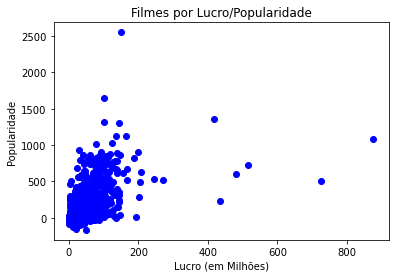

In [6]:
# budget - custo do filme
# revenue - receita do filme
df["lucro"] = (df.loc[:, "revenue"] - df.loc[:, "budget"])/1000000
plt.scatter( df.loc[:, "popularity"],  df.loc[:, "lucro"], 
             c="b")
plt.title("Filmes por Lucro/Popularidade")
plt.xlabel("Lucro (em Milhões)")
plt.ylabel("Popularidade")
plt.show()

In [7]:
# Clusterização
from sklearn.cluster import KMeans
X = df.loc[:, ["popularity", "lucro"]]
X.head()

,popularity,lucro
0,150.437577,2550.965087
1,139.082615,661.000000
2,107.376788,635.674609
3,112.312950,834.939099
4,43.926995,24.139100


In [8]:
y_pred = KMeans(n_clusters=3).fit_predict(X) 
df["cluster"] = y_pred
df.loc[ :, ["popularity", "lucro", 'cluster']].head()

,popularity,lucro,cluster
0,150.437577,2550.965087,1
1,139.082615,661.000000,1
2,107.376788,635.674609,1
3,112.312950,834.939099,1
4,43.926995,24.139100,0


In [12]:
df.cluster.value_counts()

0    4098
2     593
1     112
Name: cluster, dtype: int64

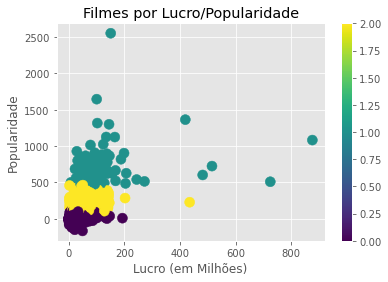

In [13]:
matplotlib.style.use("ggplot")

fig = plt.figure()
ax = fig.add_subplot(111)

scatter = ax.scatter( df.loc[:, "popularity"], df.loc[:, "lucro"], c=df["cluster"], s=100)
plt.title("Filmes por Lucro/Popularidade")
plt.xlabel("Lucro (em Milhões)")
plt.ylabel("Popularidade")
plt.colorbar(scatter)
ax.set_aspect('auto')
#plt.colorbar(label=y_pred)
#plt.legend()

plt.show()

In [14]:
df[ df["cluster"] == 2].sort_values(by='revenue', ascending=False ) [:20]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title,vote_average,vote_count,Custo,Receita,lucro,cluster
14,225000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.manofsteel.com/,49521,"[{""id"": 83, ""name"": ""saving the world""}, {""id""...",en,Man of Steel,A young boy learns that he has extraordinary p...,99.398009,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,You will believe that a man can fly.,Man of Steel,6.5,6359,"225,000,000","662,845,518",437.845518,2
18,225000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 35, ""nam...",http://www.sonypictures.com/movies/meninblack3/,41154,"[{""id"": 4379, ""name"": ""time travel""}, {""id"": 5...",en,Men in Black 3,Agents J (Will Smith) and K (Tommy Lee Jones) ...,52.035179,"[{""name"": ""Amblin Entertainment"", ""id"": 56}, {...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,They are back... in time.,Men in Black 3,6.2,4160,"225,000,000","624,026,776",399.026776,2
79,200000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 28, ""...",http://www.ironmanmovie.com/,10138,"[{""id"": 8613, ""name"": ""malibu""}, {""id"": 8828, ...",en,Iron Man 2,With the world now aware of his dual life as t...,77.300194,"[{""name"": ""Marvel Studios"", ""id"": 420}]",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,"It's not the armor that makes the hero, but th...",Iron Man 2,6.6,6849,"200,000,000","623,933,331",423.933331,2
120,150000000,"[{""id"": 10751, ""name"": ""Family""}, {""id"": 16, ""...",http://www.madagascar-themovie.com,10527,"[{""id"": 409, ""name"": ""africa""}, {""id"": 931, ""n...",en,Madagascar: Escape 2 Africa,"Alex, Marty, Melman, Gloria, King Julien, Maur...",44.141021,"[{""name"": ""DreamWorks Animation"", ""id"": 521}]",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Still together. Still lost!,Madagascar: Escape 2 Africa,6.2,1810,"150,000,000","603,900,354",453.900354,2
277,150000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 28, ""...",http://www.mgm.com/#/our-titles/233/Casino-Roy...,36557,"[{""id"": 131, ""name"": ""italy""}, {""id"": 383, ""na...",en,Casino Royale,"Le Chiffre, a banker to the world's terrorists...",88.935165,"[{""name"": ""Eon Productions"", ""id"": 7576}, {""na...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Everyone has a past. Every legend has a beginn...,Casino Royale,7.3,3855,"150,000,000","599,045,960",449.045960,2
6,260000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...",http://disney.go.com/disneypictures/tangled/,38757,"[{""id"": 1562, ""name"": ""hostage""}, {""id"": 2343,...",en,Tangled,When the kingdom's most wanted-and most charmi...,48.681969,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,They're taking adventure to new lengths.,Tangled,7.4,3330,"260,000,000","591,794,936",331.794936,2
185,132000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 53, ""...",NaN,74,"[{""id"": 447, ""name"": ""post traumatic stress d...",en,War of the Worlds,Ray Ferrier is a divorced dockworker and less-...,48.572726,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,They're already here.,War of the Worlds,6.2,2322,"132,000,000","591,739,379",459.739379,2
11,200000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 28, ""...",http://www.mgm.com/view/movie/234/Quantum-of-S...,10764,"[{""id"": 627, ""name"": ""killing""}, {""id"": 1568, ...",en,Quantum of Solace,Quantum of Solace continues the adventures of ...,107.928811,"[{""name"": ""Eon Productions"", ""id"": 7576}]",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,"For love, for hate, for justice, for revenge."

In [15]:
df[ df["cluster"] == 1].sort_values(by='revenue', ascending=False ) [:10]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title,vote_average,vote_count,Custo,Receita,lucro,cluster
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"237,000,000","2,787,965,087",2550.965087,1
25,200000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...",http://www.titanicmovie.com,597,"[{""id"": 2580, ""name"": ""shipwreck""}, {""id"": 298...",en,Titanic,"84 years later, a 101-year-old woman named Ros...",100.025899,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Nothing on Earth could come between them.,Titanic,7.5,7562,"200,000,000","1,845,034,188",1645.034188,1
16,220000000,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",http://marvel.com/avengers_movie/,24428,"[{""id"": 242, ""name"": ""new york""}, {""id"": 5539,...",en,The Avengers,When an unexpected enemy emerges and threatens...,144.448633,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Some assembly required.,The Avengers,7.4,11776,"220,000,000","1,519,557,910",1299.557910,1
28,150000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.jurassicworld.com/,135397,"[{""id"": 1299, ""name"": ""monster""}, {""id"": 1718,...",en,Jurassic World,Twenty-two years after the events of Jurassic ...,418.708552,"[{""name"": ""Universal Studios"", ""id"": 13}, {""na...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The park is open.,Jurassic World,6.5,8662,"150,000,000","1,513,528,810",1363.528810,1
44,190000000,"[{""id"": 28, ""name"": ""Action""}]",http://www.furious7.com/,168259,"[{""id"": 830, ""name"": ""car race""}, {""id"": 3428,...",en,Furious 7,Deckard Shaw seeks revenge against Dominic Tor...,102.322217,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Vengeance Hits Home,Furious 7,7.3,4176,"190,000,000","1,506,249,360",1316.249360,1
7,280000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://marvel.com/movies/movie/193/avengers_ag...,99861,"[{""id"": 8828, ""name"": ""marvel comic""}, {""id"": ...",en,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...,134.279229,"[{""name"": ""Marvel Studios"", ""id"": 420}, {""name...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,A New Age Has Come.,Avengers: Age of Ultron,7.3,6767,"280,000,000","1,405,403,694",1125.403694,1
124,150000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 12, ""...",http://movies.disney.com/frozen,109445,"[{""id"": 2011, ""name"": ""queen""}, {""id"": 4344, ""...",en,Frozen,Young princess Anna of Arendelle dreams about ...,165.125366,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Only the act of true love will thaw a frozen h...,Frozen,7.3,5295,"150,000,000","1,274,219,009",1124.219009,1
31,200000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://marvel.com/ironman3,68721,"[{""id"": 949, ""name"": ""terrorist""}, {""id"": 5597...",en,Iron Man 3,When Tony Stark's world is torn apart by a for...,77.682080,"[{""name"": ""Marvel Studios"", ""id"": 420}]",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Unleash the power behind the armor.,Iron Man 3,6.8,8806,"200,000,000","1,215,439,994",1015.439994,1
546,74000000,"[{""id"": 10751, ""name"": ""Family""}, {""id"": 16, ""...",http://ww

In [16]:
def plot_cluster(df, centroids, xdata_name, ydata_name, title, xlabel, ylabel):

    # Set style of scatterplot
    sns.set_context("notebook", font_scale=1.1)
    sns.set_style("ticks")
    
    # Create scatterplot of dataframe
    sns.lmplot(xdata_name, # Horizontal axis
               ydata_name, # Vertical axis
               data=df, # Data source
               fit_reg=False, # Don't fix a regression line
               hue="cluster")
    
    plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', 
            linewidths=3,
            color='k',)

    
    # Set title
    plt.title(title)
    # Set x-axis label
    plt.xlabel(xlabel)
    # Set y-axis label
    plt.ylabel(ylabel)
    plt.show()

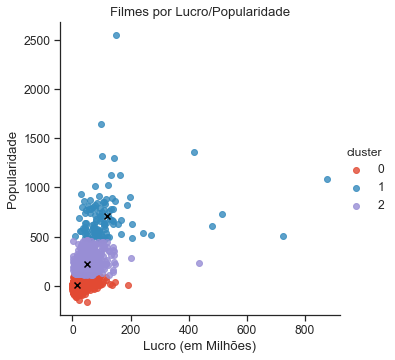

In [17]:
n_clusters = 3
kmeans = KMeans(n_clusters).fit(X)
ypred = KMeans(n_clusters).fit_predict(X)
df["cluster"] = y_pred
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plot_cluster(df, centroids, "popularity", "lucro", title = "Filmes por Lucro/Popularidade", 
             xlabel =  "Lucro (em Milhões)", ylabel = "Popularidade" )

In [18]:
# budget - custo do filme
# revenue - receita do filme
df2 = df[ df["cluster"] == 2].sort_values(by='revenue', ascending=False ) [:20]
df2[["title","popularity",'revenue', "lucro", "cluster"]].head(10)

,title,popularity,revenue,lucro,cluster
14,Man of Steel,99.398009,662845518,437.845518,2
18,Men in Black 3,52.035179,624026776,399.026776,2
79,Iron Man 2,77.300194,623933331,423.933331,2
120,Madagascar: Escape 2 Africa,44.141021,603900354,453.900354,2
277,Casino Royale,88.935165,599045960,449.045960,2
6,Tangled,48.681969,591794936,331.794936,2
185,War of the Worlds,48.572726,591739379,459.739379,2
11,Quantum of Solace,107.928811,586090727,386.090727,2
116,I Am Legend,70.867401,585349010,435.349010,2
234,The Croods,64.183321,585178928,450.178928,2


In [19]:
pd.options.display.float_format = '{:,.0f}'.format
df.loc[:,["homepage","popularity","lucro", "cluster"]].head()

,homepage,popularity,lucro,cluster
0,http://www.avatarmovie.com/,150,"2,551",1
1,http://disney.go.com/disneypictures/pirates/,139,661,1
2,http://www.sonypictures.com/movies/spectre/,107,636,1
3,http://www.thedarkknightrises.com/,112,835,1
4,http://movies.disney.com/john-carter,44,24,0


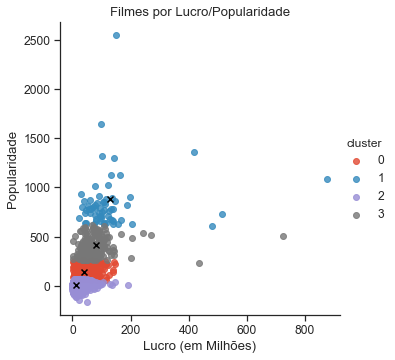

In [20]:
n_clusters = 4
kmeans = KMeans(n_clusters).fit(X)
y_pred = KMeans(n_clusters=4).fit_predict(X)
#ypred = KMeans(n_clusters=4).fit_predict(X)

#y_pred = KMeans(n_clusters=2, random_state=100).fit_predict(X)

df["cluster"] = y_pred

#y_pred = KMeans(n_clusters=3).fit_predict(X)
#df["cluster"] = y_pred


# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plot_cluster(df, centroids, "popularity", "lucro", title = "Filmes por Lucro/Popularidade", 
             xlabel =  "Lucro (em Milhões)", ylabel = "Popularidade" )

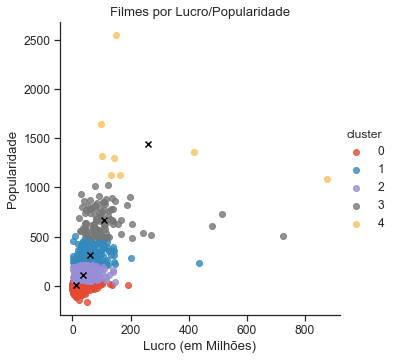

In [21]:
n_clusters = 5
kmeans = KMeans(n_clusters).fit(X)
y_pred = KMeans(n_clusters).fit_predict(X)
df["cluster"] = y_pred
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plot_cluster(df, centroids, "popularity", "lucro", title = "Filmes por Lucro/Popularidade", 
             xlabel =  "Lucro (em Milhões)", ylabel = "Popularidade" )

In [25]:
# budget - custo do filme
# revenue - receita do filme
df2 = df[ df["cluster"] == 0].sort_values(by='revenue', ascending=False ) [:20]
df2[["title","popularity",'revenue', "lucro", "cluster"]].head(15)

,title,popularity,revenue,lucro,cluster
4,John Carter,44,284139100,24,0
70,Wild Wild West,41,222104681,52,0
41,Green Lantern,52,219851172,20,0
87,Tomorrowland,130,209154322,19,0
48,Jack the Giant Slayer,43,197687603,3,0
69,Hugo,32,185770160,16,0
61,Jupiter Ascending,85,183987723,8,0
175,The BFG,44,183345589,43,0
104,Poseidon,21,181674817,22,0
73,Evan Almighty,27,173000000,-2,0


In [23]:
#df2 = df[ df["title"].apply(lambda x: x is 'furious') ].sort_values(by='revenue', ascending=False ) [:20]
df2[["title","popularity",'revenue', "lucro", "cluster"]].head(10)

,title,popularity,revenue,lucro,cluster
15,The Chronicles of Narnia: Prince Caspian,54,419651413,195,2
10,Superman Returns,58,391081192,121,2
67,Monsters vs Aliens,36,381509870,207,2
23,The Golden Compass,43,372234864,192,2
43,Terminator Salvation,72,371353001,171,2
74,Edge of Tomorrow,79,370541256,193,2
62,The Legend of Tarzan,43,356743061,177,2
128,Angels & Demons,67,356613439,207,2
101,X-Men: First Class,3,353624124,194,2
56,Star Trek Beyond,65,343471816,158,2


In [26]:
df[df['title'].str.contains('Titanic')]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title,vote_average,vote_count,Custo,Receita,lucro,cluster
25,200000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...",http://www.titanicmovie.com,597,"[{""id"": 2580, ""name"": ""shipwreck""}, {""id"": 298...",en,Titanic,"84 years later, a 101-year-old woman named Ros...",100,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Nothing on Earth could come between them.,Titanic,8,7562,"200,000,000","1,845,034,188","1,645",4
1269,0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 18, ""nam...",NaN,24575,[],en,Raise the Titanic,"To obtain a supply of a rare mineral, a ship r...",2,"[{""name"": ""ITC Entertainment"", ""id"": 1584}]",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,They've found the Titanic. There's just one th...,Raise the Titanic,5,21,0,0,0,0
3103,0,"[{""id"": 18, ""name"": ""Drama""}]",NaN,115872,[],en,La femme de chambre du Titanic,"Horty, a French foundry worker, wins a contest...",1,[],...,"[{""iso_639_1"": ""hu"", ""name"": ""Magyar""}, {""iso_...",Released,NaN,The Chambermaid on the Titanic,5,3,0,0,0,0


In [27]:
y_pred[:5]

array([4, 3, 3, 3, 0], dtype=int32)

In [28]:
df.cluster.value_counts()

0    3596
2     847
1     258
3      94
4       8
Name: cluster, dtype: int64

In [29]:
df.loc[:,["homepage","popularity","lucro", "cluster"]].head()

,homepage,popularity,lucro,cluster
0,http://www.avatarmovie.com/,150,"2,551",4
1,http://disney.go.com/disneypictures/pirates/,139,661,3
2,http://www.sonypictures.com/movies/spectre/,107,636,3
3,http://www.thedarkknightrises.com/,112,835,3
4,http://movies.disney.com/john-carter,44,24,0


In [31]:
# James Cameron lucra US$ 350 milhões com 'Avatar ... 
# Arrecadou US$ 97 milhões com "Titanic"
df.loc[:,["homepage","popularity","lucro", "cluster"]].sort_values(by="lucro", ascending=False).head(15)

,homepage,popularity,lucro,cluster
0,http://www.avatarmovie.com/,150,"2,551",4
25,http://www.titanicmovie.com,100,"1,645",4
28,http://www.jurassicworld.com/,419,"1,364",4
44,http://www.furious7.com/,102,"1,316",4
16,http://marvel.com/avengers_movie/,144,"1,300",4
7,http://marvel.com/movies/movie/193/avengers_ag...,134,"1,125",4
124,http://movies.disney.com/frozen,165,"1,124",4
546,http://www.minionsmovie.com/,876,"1,083",4
329,http://www.lordoftherings.net,124,"1,025",3
31,http://marvel.com/ironman3,78,"1,015",3


### Predição de novos dados

In [32]:
y_pred = KMeans(n_clusters, random_state=0).fit(X)
df["cluster"] = y_pred.labels_
df.loc[:,["homepage","popularity","lucro", "cluster"]].head()

,homepage,popularity,lucro,cluster
0,http://www.avatarmovie.com/,150,"2,551",4
1,http://disney.go.com/disneypictures/pirates/,139,661,2
2,http://www.sonypictures.com/movies/spectre/,107,636,2
3,http://www.thedarkknightrises.com/,112,835,2
4,http://movies.disney.com/john-carter,44,24,0


In [33]:
y_pred = KMeans(n_clusters, random_state=0).fit_predict(X)
df.loc[:,["homepage","popularity","lucro", "cluster"]].head()

,homepage,popularity,lucro,cluster
0,http://www.avatarmovie.com/,150,"2,551",4
1,http://disney.go.com/disneypictures/pirates/,139,661,2
2,http://www.sonypictures.com/movies/spectre/,107,636,2
3,http://www.thedarkknightrises.com/,112,835,2
4,http://movies.disney.com/john-carter,44,24,0


In [34]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)

popularity = 150.437577
lucro = 2550.965087
kmeans.predict([[popularity, lucro], [130, 500], [43,24]])

array([4, 2, 0], dtype=int32)

In [35]:
def plot_new_data_cluster(df, x_new, y_new, centroids, xdata_name, ydata_name, title, xlabel, ylabel):

    # Set style of scatterplot
    sns.set_context("notebook", font_scale=1.1)
    sns.set_style("ticks")
    
    # Create scatterplot of dataframe
    sns.lmplot(xdata_name, # Horizontal axis
               ydata_name, # Vertical axis
               data=df, # Data source
               fit_reg=False, # Don't fix a regression line
               hue="cluster")
    
    plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', 
            linewidths=3,
            color='k',)

    
    plt.scatter(x_new, y_new, c='red', marker='x', s=100)
    
    # Set title
    plt.title(title)
    # Set x-axis label
    plt.xlabel(xlabel)
    # Set y-axis label
    plt.ylabel(ylabel)
    plt.show()

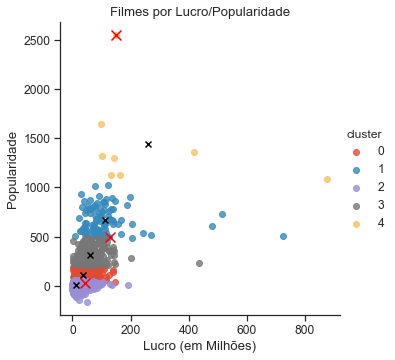

In [36]:
n_clusters = 5
kmeans = KMeans(n_clusters).fit(X)
y_pred = KMeans(n_clusters).fit_predict(X)
df["cluster"] = y_pred

centroids = kmeans.cluster_centers_

# os novos dados
popularity = 150.437577
lucro = 2550.965087
dados_x = [[popularity, lucro], [130, 500], [43,24]]
x_new = [x[0] for x in dados_x]
y_new = [y[1] for y in dados_x]


plot_new_data_cluster(df, x_new, y_new, centroids, "popularity", "lucro", title = "Filmes por Lucro/Popularidade", 
             xlabel =  "Lucro (em Milhões)", ylabel = "Popularidade" )

In [37]:
# centróides
kmeans.cluster_centers_

array([[  12.31261872,    1.94625786],
       [ 110.70365888,  672.66544345],
       [  60.62386961,  311.71669891],
       [ 261.36609725, 1438.4611275 ],
       [  36.15269061,  109.07505615]])

In [38]:
kmeans.labels_

array([3, 1, 1, ..., 0, 0, 0], dtype=int32)

In [39]:
len(kmeans.labels_)

4803

In [40]:
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title,vote_average,vote_count,Custo,Receita,lucro,cluster
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7,11800,"237,000,000","2,787,965,087","2,551",4
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,7,4500,"300,000,000","961,000,000",661,1
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6,4466,"245,000,000","880,674,609",636,1
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,8,9106,"250,000,000","1,084,939,099",835,1
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",44,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6,2124,"260,000,000","284,139,100",24,2


In [41]:
df[df["cluster"]==4].head(7)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title,vote_average,vote_count,Custo,Receita,lucro,cluster
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7,11800,"237,000,000","2,787,965,087","2,551",4
7,280000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://marvel.com/movies/movie/193/avengers_ag...,99861,"[{""id"": 8828, ""name"": ""marvel comic""}, {""id"": ...",en,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...,134,"[{""name"": ""Marvel Studios"", ""id"": 420}, {""name...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,A New Age Has Come.,Avengers: Age of Ultron,7,6767,"280,000,000","1,405,403,694","1,125",4
16,220000000,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",http://marvel.com/avengers_movie/,24428,"[{""id"": 242, ""name"": ""new york""}, {""id"": 5539,...",en,The Avengers,When an unexpected enemy emerges and threatens...,144,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Some assembly required.,The Avengers,7,11776,"220,000,000","1,519,557,910","1,300",4
25,200000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...",http://www.titanicmovie.com,597,"[{""id"": 2580, ""name"": ""shipwreck""}, {""id"": 298...",en,Titanic,"84 years later, a 101-year-old woman named Ros...",100,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Nothing on Earth could come between them.,Titanic,8,7562,"200,000,000","1,845,034,188","1,645",4
28,150000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.jurassicworld.com/,135397,"[{""id"": 1299, ""name"": ""monster""}, {""id"": 1718,...",en,Jurassic World,Twenty-two years after the events of Jurassic ...,419,"[{""name"": ""Universal Studios"", ""id"": 13}, {""na...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The park is open.,Jurassic World,6,8662,"150,000,000","1,513,528,810","1,364",4
44,190000000,"[{""id"": 28, ""name"": ""Action""}]",http://www.furious7.com/,168259,"[{""id"": 830, ""name"": ""car race""}, {""id"": 3428,...",en,Furious 7,Deckard Shaw seeks revenge against Dominic Tor...,102,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Vengeance Hits Home,Furious 7,7,4176,"190,000,000","1,506,249,360","1,316",4
124,150000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 12, ""...",http://movies.disney.com/frozen,109445,"[{""id"": 2011, ""name"": ""queen""}, {""id"": 4344, ""...",en,Frozen,Young princess Anna of Arendelle dreams about ...,165,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Only the act of true love will thaw a frozen h...,Frozen,7,5295,"150,000,000","1,274,219,009","1,124",4


### Cenário 2 - Filmes

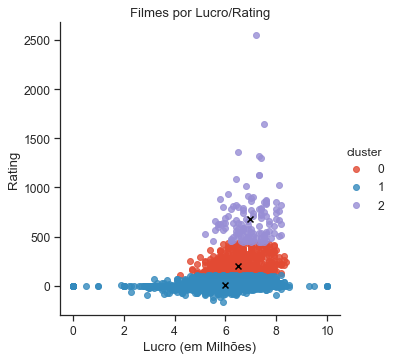

In [49]:
Xx = df.loc[:, ["vote_average", "lucro"]]
n_clusters = 3
kmeans = KMeans(n_clusters).fit(Xx)
y_pred = kmeans.labels_
df["cluster"] = y_pred
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plot_cluster(df, centroids,   "vote_average", "lucro" , title = "Filmes por Lucro/Rating", 
             xlabel =  "Lucro (em Milhões)", ylabel = "Rating" )

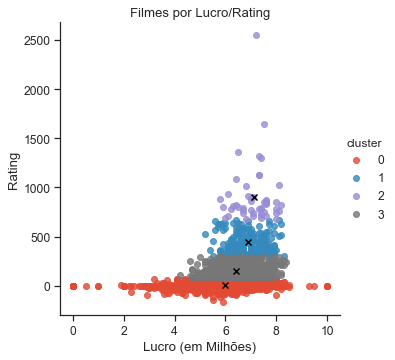

In [50]:
Xx = df.loc[:, ["vote_average", "lucro"]]
n_clusters = 4
kmeans = KMeans(n_clusters).fit(Xx)
y_pred = kmeans.labels_
df["cluster"] = y_pred
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plot_cluster(df, centroids,   "vote_average", "lucro", title = "Filmes por Lucro/Rating", 
             xlabel =  "Lucro (em Milhões)", ylabel = "Rating" )

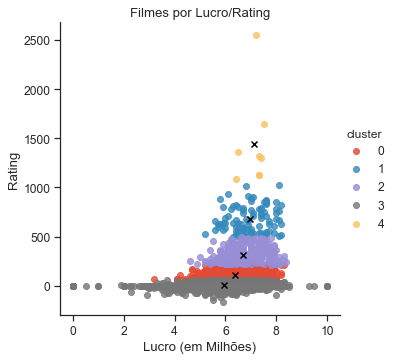

In [51]:
Xx = df.loc[:, ["vote_average", "lucro"]]
n_clusters = 5
kmeans = KMeans(n_clusters).fit(Xx)
y_pred = kmeans.labels_
df["cluster"] = y_pred
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plot_cluster(df, centroids,   "vote_average", "lucro", title = "Filmes por Lucro/Rating", 
             xlabel =  "Lucro (em Milhões)", ylabel = "Rating" )

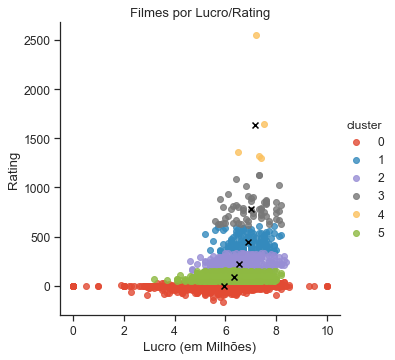

In [52]:
Xx = df.loc[:, ["vote_average", "lucro"]]
n_clusters = 6
kmeans = KMeans(n_clusters).fit(Xx)
y_pred = kmeans.labels_
df["cluster"] = y_pred
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plot_cluster(df, centroids,   "vote_average", "lucro", title = "Filmes por Lucro/Rating", 
             xlabel =  "Lucro (em Milhões)", ylabel = "Rating" )

# Determinando o melhor número de Clusters (Elbow Method)

In [53]:
Xx = Xx
Ks = range(1, 10)
km = [KMeans(n_clusters=i) for i in Ks]
score = [km[i].fit(Xx).score(Xx) for i in range(len(km))]
print(score)

[-88782462.06841055, -32518151.504649058, -17535984.71729683, -11550650.765320532, -7874022.460646829, -5682484.359572647, -4356781.667304666, -3187275.567796253, -2573805.5041234745]


In [54]:
list(range(1,9))

[1, 2, 3, 4, 5, 6, 7, 8]

In [55]:
score

[-88782462.06841055,
 -32518151.504649058,
 -17535984.71729683,
 -11550650.765320532,
 -7874022.460646829,
 -5682484.359572647,
 -4356781.667304666,
 -3187275.567796253,
 -2573805.5041234745]

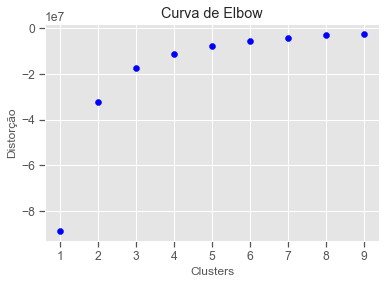

In [56]:
plt.style.use('ggplot')
plt.scatter( list(range(1,len(score)+1)), score, c="b")
plt.title("Curva de Elbow")
plt.xlabel("Clusters")
plt.ylabel("Distorção")
plt.show()